In [2]:
PROJECT_ROOT = "../../"
import sys
# The following line adds the parent directory to the python path.
sys.path.insert(0, PROJECT_ROOT) 

In [29]:
from importlib import reload

import src.experiment.sample_utils as su
import src.experiment.experiment_utils as exp
import src.dataset_handling.pamap.write_pamap as wp
import src.experiment.dataset_experiments.mnist_experiments as m_exp
import src.experiment.experiment_cpu as exp_cpu
import src.experiment.dataset_experiments.cpu_vs_gpu_mnist8m as cpu_vs_gpu

reload(su)
reload(exp)
reload(wp)
reload(m_exp)
reload(exp_cpu)
reload(cpu_vs_gpu)

<module 'src.experiment.dataset_experiments.cpu_vs_gpu_mnist8m' from '/home/hphi344/Documents/GS-DBSCAN-Analysis/analysis_notebooks/k_m_exp/../../src/experiment/dataset_experiments/cpu_vs_gpu_mnist8m.py'>

In [4]:
import os
import pandas as pd
import re

k_m_results_dir = r"/home/hphi344/Documents/GS-DBSCAN-Analysis/results/mnist/k_m"
labels_file_path = r"/home/hphi344/Documents/GS-DBSCAN-Analysis/data/mnist/mnist_labels_f16.bin"

all_results_dfs = []

for file in os.listdir(k_m_results_dir):
    if file.endswith(".json"):
        file_path = os.path.join(k_m_results_dir, file)

        matches = re.findall(r'k(\d+)_m(\d+)', file)
        
        k = int(matches[0][0])
        m = int(matches[0][1])

        if k > m:
            continue

        this_df = exp.process_results(file_path, labels_file_path)

        this_df['k'] = k
        this_df['m'] = m

        all_results_dfs.append(this_df)

all_results_df = pd.concat(all_results_dfs)

In [5]:
all_results_df

,args,clusterLabels,numClusters,times,nmi,k,m
0,\n\n## PARAMS ##\n\nData Filename: /home/hphi3...,"[-1, 0, -1, -1, -1, -1, -1, -1, 3, -1, -1, -1,...",6,"{'adjList': 21927, 'constructABMatrices': 3158...",0.416866,2,1250
0,\n\n## PARAMS ##\n\nData Filename: /home/hphi3...,"[-1, 0, -1, -1, -1, -1, -1, -1, 1, -1, -1, -1,...",9,"{'adjList': 8549, 'constructABMatrices': 32262...",0.358509,20,100
0,\n\n## PARAMS ##\n\nData Filename: /home/hphi3...,"[-1, 0, -1, -1, -1, -1, -1, -1, 3, -1, -1, -1,...",6,"{'adjList': 25528, 'constructABMatrices': 3219...",0.424677,2,2000
0,\n\n## PARAMS ##\n\nData Filename: /home/hphi3...,"[-1, 0, -1, -1, -1, -1, -1, -1, 2, -1, -1, -1,...",19,"{'adjList': 7475, 'constructABMatrices': 31982...",0.339230,40,50
0,\n\n## PARAMS ##\n\nData Filename: /home/hphi3...,"[-1, 0, -1, -1, -1, -1, -1, -1, 5, -1, -1, -1,...",15,"{'adjList': 1965, 'constructABMatrices': 30964...",0.278040,5,50
0,\n\n## PARAMS ##\n\nData Filename: /home/hphi3...,"[-1, 0, -1, -1, -1, -1, -1, -1, 3, -1, -1, -1,...",7,"{'adjList': 25090, 'constructABMatrices': 3098...",0.421077,1,3500
0,\n\n## PARAMS ##\n\nData Filename: /home/hphi3...,"[-1, 0, -1, -1, -1, -1, -1, -1, 2, -1, -1, -1,...",6,"{'adjList': 13697, 'constructABMatrices': 3201...",0.397214,5,400
0,\n\n## PARAMS ##\n\nData Filename: /home/hphi3...,"[-1, 0, -1, -1, -1, -1, -1, -1, 2, -1, -1, -1,...",13,"{'adjList': 2820, 'constructABMatrices': 31433...",0.299851,10,50
0,\n\n## PARAMS ##\n\nData Filename: /home/hphi3...,"[-1, 0, -1, -1, -1, -1, -1, -1, 2, -1, -1, -1,...",7,"{'adjList': 27356, 'constructABMatrices': 3152...",0.423235,2,1600
0,\n\n## PARAMS ##\n\nData Filename: /home/hphi3...,"[-1, 0, -1, -1, -1, -1, -1, -1, 2, -1, -1, -1,...",5,"{'adjList': 12884, 'constructABMatrices': 3090...",0.395572,2,750


In [6]:
all_results_df.drop(columns=["clusterLabels"], inplace=True)

In [7]:
all_results_df.sort_values(by="k", ascending=False, inplace=True)

In [8]:
all_results_df

,args,numClusters,times,nmi,k,m
0,\n\n## PARAMS ##\n\nData Filename: /home/hphi3...,19,"{'adjList': 7475, 'constructABMatrices': 31982...",0.339230,40,50
0,\n\n## PARAMS ##\n\nData Filename: /home/hphi3...,9,"{'adjList': 8549, 'constructABMatrices': 32262...",0.358509,20,100
0,\n\n## PARAMS ##\n\nData Filename: /home/hphi3...,13,"{'adjList': 2820, 'constructABMatrices': 31433...",0.299851,10,50
0,\n\n## PARAMS ##\n\nData Filename: /home/hphi3...,7,"{'adjList': 12809, 'constructABMatrices': 3247...",0.379413,10,200
0,\n\n## PARAMS ##\n\nData Filename: /home/hphi3...,15,"{'adjList': 1965, 'constructABMatrices': 30964...",0.278040,5,50
0,\n\n## PARAMS ##\n\nData Filename: /home/hphi3...,6,"{'adjList': 13697, 'constructABMatrices': 3201...",0.397214,5,400
0,\n\n## PARAMS ##\n\nData Filename: /home/hphi3...,6,"{'adjList': 21927, 'constructABMatrices': 3158...",0.416866,2,1250
0,\n\n## PARAMS ##\n\nData Filename: /home/hphi3...,6,"{'adjList': 25528, 'constructABMatrices': 3219...",0.424677,2,2000
0,\n\n## PARAMS ##\n\nData Filename: /home/hphi3...,7,"{'adjList': 27356, 'constructABMatrices': 3152...",0.423235,2,1600
0,\n\n## PARAMS ##\n\nData Filename: /home/hphi3...,5,"{'adjList': 12884, 'constructABMatrices': 3090...",0.395572,2,750


In [8]:
all_results_df.to_parquet(f"{k_m_results_dir}/k_m_results.parquet")

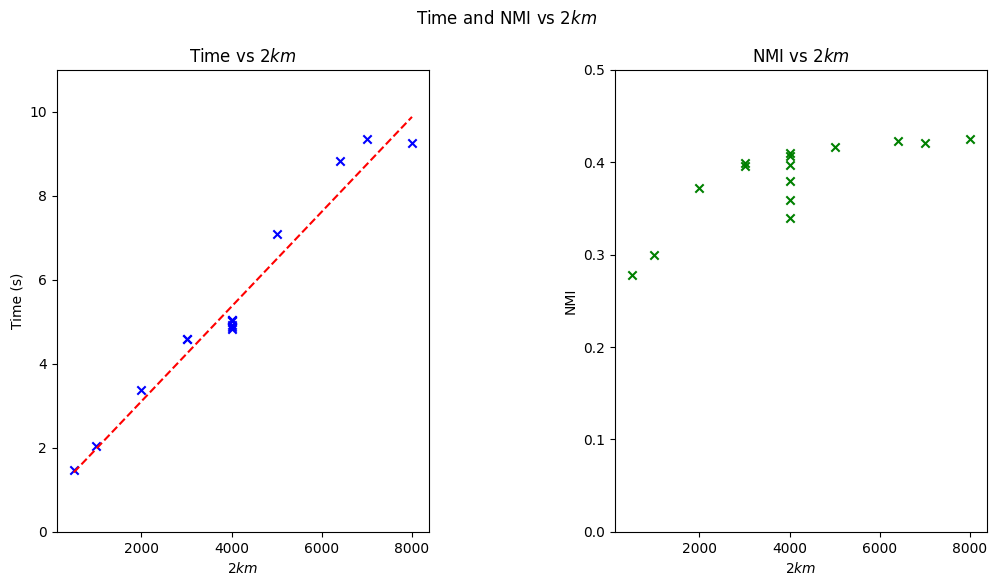

In [35]:
import matplotlib.pyplot as plt
# plt.rcParams['text.usetex'] = True
import numpy as np

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

ax1 = axes[0]
ax2 = axes[1]

k_vals = all_results_df['k']
m_vals = all_results_df['m']

k_m_product = 2 * k_vals * m_vals

overall_times = np.array([all_results_df['times'].iloc[i]["overall"] for i in range(len(all_results_df))], dtype=np.float64)

overall_times = overall_times / 1e6

slope, intercept = np.polyfit(k_m_product, overall_times, 1)

fit_x_vals = np.array([k_m_product.min(), k_m_product.max()])

ax1.plot(fit_x_vals, slope * fit_x_vals + intercept, c='r', label='Best Fit', linestyle='--')

ax1.scatter(k_m_product, overall_times, c='b', label='Time', marker='x')

ax2.scatter(k_m_product, all_results_df['nmi'], c='g', label='NMI', marker='x')

fig.suptitle(r"Time and NMI vs $2km$")
ax1.set_title(r"Time vs $2km$")
ax2.set_title(r"NMI vs $2km$")	
for ax in axes: ax.set_xlabel(r"$2km$")
ax1.set_ylabel("Time (s)")
ax2.set_ylabel("NMI")
ax1.set_ylim(0, 11)
ax2.set_ylim(0, 0.5)

plt.subplots_adjust(wspace=0.5)

plt.savefig(f"../plots/time_vs_2km.png", dpi=300)

# plt.legend()  

In [72]:
k_m_values = [(2, 500), (2, 1250), (1, 3500)]

eps = 0.11

dataset_file = r"/home/hphi344/Documents/GS-DBSCAN-Analysis/data/mnist/mnist_images_row_major_f16.bin"
labels_file = r"/home/hphi344/Documents/GS-DBSCAN-Analysis/data/mnist/mnist_labels_f16.bin"

params = exp.RunParams(datasetFilename=dataset_file, labels_filename=labels_file, n=70_000, d=784, D=1024, minPts=50, eps=eps, alpha=1.2,
                        distancesBatchSize=100, distanceMetric="COSINE",
                        clusterBlockSize=256, clusterOnCpu=True, needToNormalize=True, print_cmd=True,
                        verbose=False, useBatchDbscan=True, timeIt=True, useBatchABMatrices=True,
                        useBatchNorm=True,
                        datasetDType="f16", ABatchSize=10_000, BBatchSize=28, miniBatchSize=10_000, normBatchSize=10_000, ignoreAdjListSymmetry=False)

results_df = exp.run_k_m_experiments(k_m_vals=k_m_values, params=params, parquet_name="mnist_k_m_experiments.parquet")

Running GS-DBSCAN

/home/hphi344/Documents/GS-DBSCAN-CPP/build-release/GS-DBSCAN --datasetFilename /home/hphi344/Documents/GS-DBSCAN-Analysis/data/mnist/mnist_images_row_major_f16.bin --outputFilename /home/hphi344/Documents/GS-DBSCAN-Analysis/results/results__mnist_images_row_major_f16_n70000_d784_D1024_mp50_k2_m500_e0.1100.json --n 70000 --d 784 --D 1024 --minPts 50 --k 2 --m 500 --eps 0.11 --alpha 1.2 --distancesBatchSize 100 --distanceMetric COSINE --clusterBlockSize 256 --datasetDType f16 --miniBatchSize 10000 --ABatchSize 10000 --BBatchSize 28 --normBatchSize 10000 --sigmaEmbed 1 --clusterOnCpu --needToNormalize --useBatchClustering --useBatchABMatrices --useBatchNorm --timeIt
Standard Output:
 Running GsDBSCAN-CPP
Params: 

## PARAMS ##

Data Filename: /home/hphi344/Documents/GS-DBSCAN-Analysis/data/mnist/mnist_images_row_major_f16.bin
Output Filename: /home/hphi344/Documents/GS-DBSCAN-Analysis/results/results__mnist_images_row_major_f16_n70000_d784_D1024_mp50_k2_m500_e0.1100.js

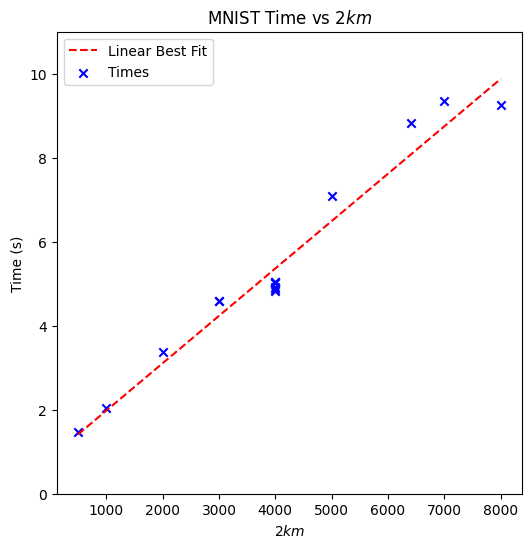

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# No need for subplots, just create a single figure and axis
fig = plt.figure(figsize=(6, 6))
ax1 = fig.add_subplot(111)

k_vals = all_results_df['k']
m_vals = all_results_df['m']

k_m_product = 2 * k_vals * m_vals

overall_times = np.array([all_results_df['times'].iloc[i]["overall"] for i in range(len(all_results_df))], dtype=np.float64)

overall_times = overall_times / 1e6

slope, intercept = np.polyfit(k_m_product, overall_times, 1)

fit_x_vals = np.array([k_m_product.min(), k_m_product.max()])

ax1.plot(fit_x_vals, slope * fit_x_vals + intercept, c='r', label='Linear Best Fit', linestyle='--')

ax1.scatter(k_m_product, overall_times, c='b', label='Times', marker='x')

ax1.set_title(r"MNIST Time vs $2km$")
ax1.set_xlabel(r"$2km$")
ax1.set_ylabel("Time (s)")
ax1.set_ylim(0, 11)
plt.legend()

plt.savefig(f"../plots/time_vs_2km_mnist.png", dpi=300)

# plt.legend()

In [30]:
tex = exp.get_k_m_experiments_table(all_results_df)
print(tex)

\begin{tabular}{ccccc}
\toprule
k & m & 2km & Time (s) & NMI \\
\midrule
5 & 50 & 500 & 1.48 & 0.28 \\
10 & 50 & 1000 & 2.05 & 0.30 \\
2 & 500 & 2000 & 3.38 & 0.37 \\
2 & 750 & 3000 & 4.60 & 0.40 \\
1 & 1500 & 3000 & 4.60 & 0.40 \\
20 & 100 & 4000 & 4.82 & 0.36 \\
40 & 50 & 4000 & 4.87 & 0.34 \\
10 & 200 & 4000 & 4.92 & 0.38 \\
1 & 2000 & 4000 & 5.01 & 0.41 \\
5 & 400 & 4000 & 5.04 & 0.40 \\
2 & 1000 & 4000 & 5.05 & 0.41 \\
2 & 1250 & 5000 & 7.10 & 0.42 \\
2 & 1600 & 6400 & 8.82 & 0.42 \\
1 & 3500 & 7000 & 9.35 & 0.42 \\
2 & 2000 & 8000 & 9.25 & 0.42 \\
\bottomrule
\end{tabular}

